<a href="https://colab.research.google.com/github/NydiaLiu98/Transport_AI_Course/blob/main/Text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Develop the text classification model for the traffic sentiment analysis

Dataset: Pakistani Traffic Sentiment Analysis dataset

This dataset comprises two columns: 'Text' and 'Sentiment.' The positive reviews labeled as '0' and negative reviews as '1'.

So, it's a binary classification problem.

## Upload the dataset

In [1]:
import pandas as pd
import os

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

# Display the data
df.head()

,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       2109 non-null   object
 1   Sentiment  2109 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.1+ KB


In [6]:
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1010   1008                   Traffic open at shahrah e faisal    2
1          1099   1079  Road is closed for traffic at star gate toward...    3

In [7]:
df = df.drop_duplicates()
df.groupby('Sentiment').describe()

Text                                          
          count unique                           top freq
Sentiment                                                
0          1008   1008           I8 is clear at 8 am    1
1          1079   1079  Express highway have traffic    1

## Find the best text vectorization method and the besty text classification model

{'C': 1, 'kernel': 'rbf'}
The accuracy of the model is: 0.9904306220095693


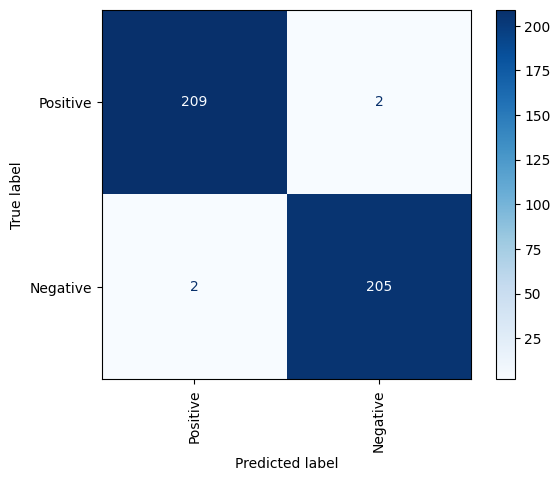

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os
from sklearn.model_selection import GridSearchCV

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

#(1) CountVectorizer
# vectorizer = CountVectorizer(ngram_range=(1, 2),
#                # stop_words='english',
#                min_df=20)

#(2) #HashingVectorizer
# vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

#(3)TfidfVectorizer
vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    # stop_words='english'
    )

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

#-*-*-*-*-*-*use the grid search to find the best model parameters-*-*-*-*-*-*

#(1)LR
# model = LogisticRegression(max_iter=5000, solver="saga")
# param_grid = [
#     {"penalty": ["l2"],
#      "C": [0.001, 0.01, 0.1, 1, 10, 100]},
#     {"penalty": ["l1"],
#      "C": [0.001, 0.01, 0.1, 1, 10, 100]},
#     {"penalty": ["elasticnet"],
#      "C": [0.001, 0.01, 0.1, 1, 10, 100],
#      "l1_ratio": [0.2, 0.5, 0.8]},
# ]

#(2)KNN
# model=KNeighborsClassifier()
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance']
# }

#(3)RF
# model = RandomForestClassifier(random_state=0)
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

#(4)XGBoost
# model =  XGBClassifier()
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5]
# }


# #(5)SVM
model= SVC(probability=True)
param_grid = {'kernel': ['linear', 'rbf', 'poly'],'C': [0.1, 1, 10]}

#(6)Naïve Bayes models
# model=BernoulliNB()
# param_grid = {'alpha': [0.1, 0.5, 1],'force_alpha': [True,False]}

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all
# parameter combinations.
grid_search.fit(x_train_vectorized, y_train)

#`best_params` and `best_score` store the best hyperparameters and their
# corresponding accuracy score.
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

#The `model` is updated with the best estimator found during the grid search,
# which can be used for further analysis.
model = grid_search.best_estimator_

#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

# confusion matrix display
cmd.from_estimator(
    model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
    )

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

In this case, TfidfVectorizer is choosen as the best text vectorization method.
* **LR:** Best parameters: {'C': 1, 'penalty': 'l1'}; Accuracy: 0.9856459330143541
* **KNN:** Best parameters: {'n_neighbors': 7, 'weights': 'distance'}; Accuracy: 0.9593301435406698
* **RF:** Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}; **Accuracy: 0.9904306220095693**
* **XGBoost:** Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}; Accuracy: 0.9832535885167464
* **SVM:** Best parameters: {'C': 1, 'kernel': 'rbf'}; **Accuracy: 0.9904306220095693**
* **Naïve Bayes models:** Best parameters: {'alpha': 0.1, 'force_alpha': True}; Accuracy: 0.9449760765550239

RF and SVM achieved the same accuracy (0.9904); however, **SVM** required less training time.
